In [1]:
# You can also use this section to suppress warnings generated by your code:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from itertools import chain
from matplotlib.patches import Ellipse


sns.set_context('notebook')
sns.set_style('white')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv")
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [3]:
data.shape

(2216, 19)

In [15]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit(data).transform(data)
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit(X).transform(X)

model = GaussianMixture(n_components=4, random_state=0)
model.fit(reduced_2_PCA)

GaussianMixture(n_components=4, random_state=0)

In [16]:
PCA_2_pred = model.predict(reduced_2_PCA)

Text(0, 0.5, 'PCA 2')

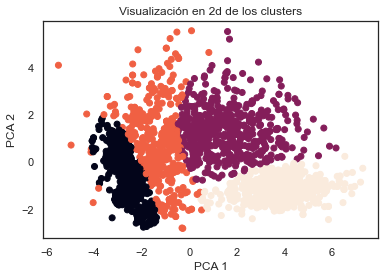

In [17]:
x = reduced_2_PCA[:,0]
y = reduced_2_PCA[:,1]
plt.scatter(x, y, c=PCA_2_pred)
plt.title("Visualización en 2d de los clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0.92, 'Vista en 3D de los clusters')

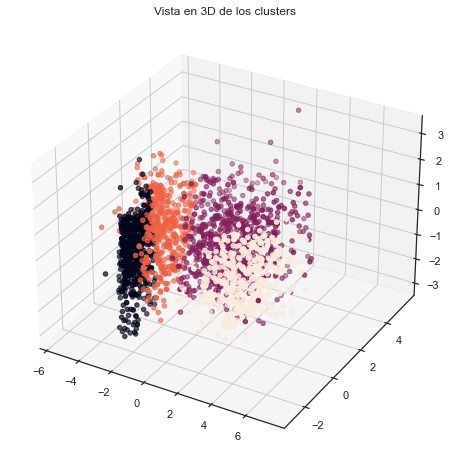

In [14]:
# PCA with n=3 and clustering
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit(X).transform(X)
mod = GaussianMixture(n_components=4, random_state=0)
PCA_3_pred = mod.fit(reduced_3_PCA).predict(reduced_3_PCA)

# plotting
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_3_PCA['PCA 1'],reduced_3_PCA['PCA 2'],reduced_3_PCA['PCA 3'], c=PCA_3_pred)
ax.set_title("Vista en 3D de los clusters")